In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import glob
import seaborn as sns
import scipy.signal as sc
import scipy.stats as stats

In [2]:
import sys
sys.path.insert(0, r'C:/Users/Angie Michaiel/Documents/GitHub/FreelyMovingEphys')
from util.paths import find
from project_analysis.ephys.ephys_utils import load_ephys
from project_analysis.doi.doi_utils import doi_saline_label
from project_analysis.doi.doi_utils import pre_post_label
from project_analysis.doi.doi_utils import label_doi_conditions

In [3]:
# load data from days of recordings 
data_path = r'\\kraken\Z\freely_moving_ephys'
dates = ['021621','021721']
data = load_ephys(data_path,dates)


In [4]:
#Dictonary of conditions
conditions = {}
conditions['doi_saline'] = {'doi_dates':['021621'],'saline_dates':['021721']}
conditions['pre_post'] = {'pre_dates':[],'post_dates':['021721']}
conditions_df = label_doi_conditions(data,conditions)

In [5]:
# load data from days of recordings 
data_path = r'\\Niell-v2-w7\t\freely_moving_ephys\ephys_recordings'
dates = ['021621','021721']
data = load_ephys(data_path,dates)



In [6]:
#Dictonary of conditions
conditions = {}
conditions['doi_saline'] = {'doi_dates':['021721'],'saline_dates':['021621']}
conditions['pre_post'] = {'pre_dates':['021621'],'post_dates':[]}
conditions_df1 = label_doi_conditions(data,conditions)

In [7]:
s1 = conditions_df
s2 = conditions_df1
exp_df=pd.concat([s1, s2])

exp_df = exp_df.loc[exp_df['ContamPct']<=50.0]

In [8]:
#Add column of Total time of recordings as total seconds 
exp_df['Tsec_fm1'] = exp_df['fm1_spikeTraw'].str[-1]
exp_df['Tsec_fm2'] = exp_df['fm2_spikeTraw'].str[-1]
exp_df['Tsec_hf1'] = exp_df['hf1_wn_spikeT'].str[-1]
exp_df['Tsec_hf8'] = exp_df['hf8_wn_spikeTraw'].str[-1]
exp_df['Tsec_hf3'] = exp_df['hf3_gratings_spikeTraw'].str[-1]
exp_df['Tsec_hf6'] = exp_df['hf6_gratings_spikeTraw'].str[-1]



# Make colums for nspikes per recording
exp_df['Tspikes_fm1']=exp_df['fm1_spikeT'].apply(len)
exp_df['Tspikes_fm2']=exp_df['fm2_spikeT'].apply(len)
exp_df['Tspikes_hf1']=exp_df['hf1_wn_spikeT'].apply(len)
exp_df['Tspikes_hf8']=exp_df['hf8_wn_spikeT'].apply(len)
exp_df['Tspikes_hf3']=exp_df['hf3_gratings_spikeT'].apply(len)
exp_df['Tspikes_hf6']=exp_df['hf6_gratings_spikeT'].apply(len)


#Calculate mean firing rate
exp_df['meanfr_fm1'] = exp_df['Tspikes_fm1']/exp_df['Tsec_fm1']
exp_df['meanfr_fm2'] = exp_df['Tspikes_fm2']/exp_df['Tsec_fm2']
exp_df['meanfr_hf1'] = exp_df['Tspikes_hf1']/exp_df['Tsec_hf1']
exp_df['meanfr_hf8'] = exp_df['Tspikes_hf8']/exp_df['Tsec_hf8']
exp_df['meanfr_hf3'] = exp_df['Tspikes_hf3']/exp_df['Tsec_hf3']
exp_df['meanfr_hf6'] = exp_df['Tspikes_hf6']/exp_df['Tsec_hf6']

In [9]:
#df of saline and doi
doi_df=exp_df.loc[exp_df['hf7_sprasenoiseflashdoi/saline']=='doi']
saline_df=exp_df.loc[exp_df['hf7_sprasenoiseflashdoi/saline']=='saline']

C:\Users\Angie Michaiel\anaconda3\envs\DLC-CPU\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Angie Michaiel\anaconda3\envs\DLC-CPU\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


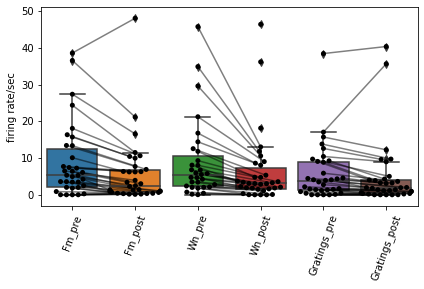

In [10]:
#plot doi fr  
fig, ax = plt.subplots()
frdoi = sns.swarmplot(data=doi_df[doi_df.columns[-6:]],ax=ax,color='black')
frdoi = sns.boxplot(hue = None, data=doi_df[doi_df.columns[-6:]])
plt.xticks(rotation=70)
plt.ylabel('firing rate/sec')
plt.tight_layout()

# We need to draw the canvas, otherwise the labels won't be positioned and 
# won't have values yet.
fig.canvas.draw()
#Lables for x axis
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'Fm_pre'
labels[1] = 'Fm_post'
labels[2] = 'Wn_pre'
labels[3] = 'Wn_post'
labels[4] = 'Gratings_pre'
labels[5] = 'Gratings_post'

ax.set_xticklabels(labels)
#Connecting individuals

#indx of each collunm 
idx0 = 0
idx1 = 1
idx2 = 2
idx3 = 3
idx4 = 4
idx5 = 5

#find paried points
locs1 = ax.get_children()[idx0].get_offsets()
locs2 = ax.get_children()[idx1].get_offsets()
locs3 = ax.get_children()[idx2].get_offsets()
locs4 = ax.get_children()[idx3].get_offsets()
locs5 = ax.get_children()[idx4].get_offsets()
locs6 = ax.get_children()[idx5].get_offsets()
for i in range(locs1.shape[0]):
    x = [locs1[i, 0], locs2[i, 0]]
    y = [locs1[i, 1], locs2[i, 1]]
    ax.plot(x, y, color='black', alpha=0.5)
for i in range(locs3.shape[0]):
    x = [locs3[i, 0], locs4[i, 0]]
    y = [locs3[i, 1], locs4[i, 1]]
    ax.plot(x, y, color='black', alpha=0.5)

for i in range(locs5.shape[0]):
    x = [locs5[i, 0], locs6[i, 0]]
    y = [locs5[i, 1], locs6[i, 1]]
    ax.plot(x, y, color='black', alpha=0.5)


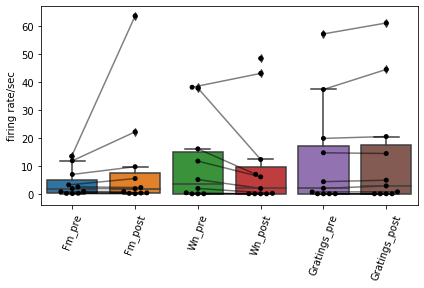

In [11]:
#plot saline fr  
fig, ax = plt.subplots()
frsaline = sns.swarmplot(data=saline_df[saline_df.columns[-6:]],ax=ax,color='black') 
frsaline = sns.boxplot(data=saline_df[saline_df.columns[-6:]])
plt.xticks(rotation=70)
plt.ylabel('firing rate/sec')
plt.tight_layout()

# We need to draw the canvas, otherwise the labels won't be positioned and 
# won't have values yet.
fig.canvas.draw()
#Lables for x axis
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'Fm_pre'
labels[1] = 'Fm_post'
labels[2] = 'Wn_pre'
labels[3] = 'Wn_post'
labels[4] = 'Gratings_pre'
labels[5] = 'Gratings_post'
ax.set_xticklabels(labels)

#Connecting individuals

#indx of each collunm 
idx0 = 0
idx1 = 1
idx2 = 2
idx3 = 3
idx4 = 4
idx5 = 5

#find paried points
locs1 = ax.get_children()[idx0].get_offsets()
locs2 = ax.get_children()[idx1].get_offsets()
locs3 = ax.get_children()[idx2].get_offsets()
locs4 = ax.get_children()[idx3].get_offsets()
locs5 = ax.get_children()[idx4].get_offsets()
locs6 = ax.get_children()[idx5].get_offsets()
for i in range(locs1.shape[0]):
    x = [locs1[i, 0], locs2[i, 0]]
    y = [locs1[i, 1], locs2[i, 1]]
    ax.plot(x, y, color='black', alpha=0.5)
for i in range(locs3.shape[0]):
    x = [locs3[i, 0], locs4[i, 0]]
    y = [locs3[i, 1], locs4[i, 1]]
    ax.plot(x, y, color='black', alpha=0.5)

for i in range(locs5.shape[0]):
    x = [locs5[i, 0], locs6[i, 0]]
    y = [locs5[i, 1], locs6[i, 1]]
    ax.plot(x, y, color='black', alpha=0.5)


In [12]:
doi_df.dtypes

Amplitude     float64
ContamPct     float64
KSLabel        object
amp           float64
ch              int64
               ...   
meanfr_fm2    float64
meanfr_hf1    float64
meanfr_hf8    float64
meanfr_hf3    float64
meanfr_hf6    float64
Length: 242, dtype: object

In [13]:
doi_df = doi_df.loc[doi_df['KSLabel']=='good']
doi_df = doi_df.loc[doi_df['fr']>=1.00]
doi_df=doi_df.drop([81,67,76])

saline_df = saline_df.loc[saline_df['KSLabel']=='good']
saline_df = saline_df.loc[saline_df['fr']>=1.00]

In [14]:
doi_df

,Amplitude,ContamPct,KSLabel,amp,ch,depth,fr,group,fm1_n_spikes,sh,...,Tspikes_hf1,Tspikes_hf8,Tspikes_hf3,Tspikes_hf6,meanfr_fm1,meanfr_fm2,meanfr_hf1,meanfr_hf8,meanfr_hf3,meanfr_hf6
5,1538.0,1.3,good,96.000031,4,676,15.167560,good,103048,0,...,18826,6962,3498,1651,27.371254,0.401099,29.609168,10.585680,9.723008,5.015581
8,1205.0,8.3,good,109.158997,9,551,12.648416,good,85933,0,...,22188,209,5656,112,24.377147,0.313229,34.890832,0.319379,15.723206,0.348782
17,1310.0,3.6,good,97.813812,20,276,33.508521,good,227656,0,...,29105,23788,13827,13283,38.581811,21.179741,45.768708,36.170710,38.436794,40.352008
21,2075.1,0.5,good,130.199249,24,176,38.572274,good,262059,0,...,13505,30509,6139,11732,36.538077,48.045294,21.236418,46.390601,17.064087,35.642447
56,963.2,9.9,good,56.565620,52,276,12.041113,good,81807,0,...,7512,7760,3267,3174,13.424437,10.435529,11.812739,11.799372,9.081041,9.643090
57,1346.6,0.3,good,74.077042,54,226,4.383297,good,29780,0,...,1273,2242,609,456,6.092604,6.229317,2.003651,3.409391,1.693664,1.386615
59,1463.2,1.3,good,72.136810,56,176,14.196847,good,96453,0,...,10674,11930,4536,4030,15.727993,11.509040,16.785174,18.139662,12.609258,12.247430


In [15]:
#grating psth analysis doi 
# Create psth_df for doi  
doi_df['maxpsth_hf3']=doi_df['hf3_gratings_grating_psth'].apply(max)
doi_df['maxpsth_hf6']=doi_df['hf6_gratings_grating_psth'].apply(max)
doi_df['maxpsth']=doi_df[['maxpsth_hf3','maxpsth_hf6']].max(axis=1)
psthdoi_df=doi_df[['hf3_gratings_grating_psth','hf6_gratings_grating_psth','maxpsth']]

#Calculate normalized psth
psthdoi_df['normalizedpsth_pre']=psthdoi_df['hf3_gratings_grating_psth']/psthdoi_df['maxpsth']
psthdoi_df['normalizedpsth_post']=psthdoi_df['hf6_gratings_grating_psth']/psthdoi_df['maxpsth']

#Calculate meanpsth
psthdoi_df['meanpsth_pre']=psthdoi_df['normalizedpsth_pre'].apply(np.mean)
psthdoi_df['meanpsth_post']=psthdoi_df['normalizedpsth_post'].apply(np.mean)


C:\Users\Angie Michaiel\anaconda3\envs\DLC-CPU\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\Angie Michaiel\anaconda3\envs\DLC-CPU\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Angie Michaiel\anaconda3\envs\DLC-CPU\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

Text(0.5, 0, 'Time')

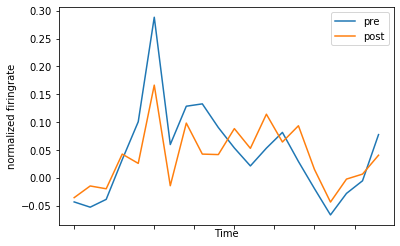

In [16]:
psthpre_acrosscell=psthdoi_df['normalizedpsth_pre'].mean()
psthpost_acrosscell=psthdoi_df['normalizedpsth_post'].mean()
pre_baseline = np.mean(psthpre_acrosscell[:5])
post_baseline=np.mean(psthpost_acrosscell[:5])

plt.plot(psthpre_acrosscell-pre_baseline,label='pre')
plt.plot(psthpost_acrosscell-post_baseline,label='post')
plt.legend()
plt.ylabel('normalized firingrate')
plt.tick_params(labelbottom=False)
plt.xlabel('Time')
#plt.savefig('doipsth.png')

In [17]:
#grating psth analysis saline 
# Create psth_df for saline  
saline_df['maxpsth_hf3']=saline_df['hf3_gratings_grating_psth'].apply(max)
saline_df['maxpsth_hf6']=saline_df['hf6_gratings_grating_psth'].apply(max)
saline_df['maxpsth']=saline_df[['maxpsth_hf3','maxpsth_hf6']].max(axis=1)
psthsaline_df=saline_df[['hf3_gratings_grating_psth','hf6_gratings_grating_psth','maxpsth']]


#Calculate normalized psth
psthsaline_df['normalizedpsth_pre']=psthsaline_df['hf3_gratings_grating_psth']/psthsaline_df['maxpsth']
psthsaline_df['normalizedpsth_post']=psthsaline_df['hf6_gratings_grating_psth']/psthsaline_df['maxpsth']

#Calculate meanpsth
psthsaline_df['meanpsth_pre']=psthsaline_df['normalizedpsth_pre'].apply(np.mean)
psthsaline_df['meanpsth_post']=psthsaline_df['normalizedpsth_post'].apply(np.mean)


C:\Users\Angie Michaiel\anaconda3\envs\DLC-CPU\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Angie Michaiel\anaconda3\envs\DLC-CPU\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Angie Michaiel\anaconda3\envs\DLC-CPU\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is try

Text(0.5, 0, 'Time')

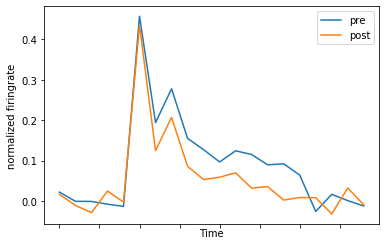

In [18]:
psthpre_acrosscell=psthsaline_df['normalizedpsth_pre'].mean()
psthpost_acrosscell=psthsaline_df['normalizedpsth_post'].mean()
pre_baseline = np.mean(psthpre_acrosscell[:5])
post_baseline=np.mean(psthpost_acrosscell[:5])

plt.plot(psthpre_acrosscell-pre_baseline,label='pre')
plt.plot(psthpost_acrosscell-post_baseline,label='post')
plt.legend()
plt.ylabel('normalized firingrate')
plt.tick_params(labelbottom=False)
plt.xlabel('Time')
#plt.savefig('salinepsth.png')

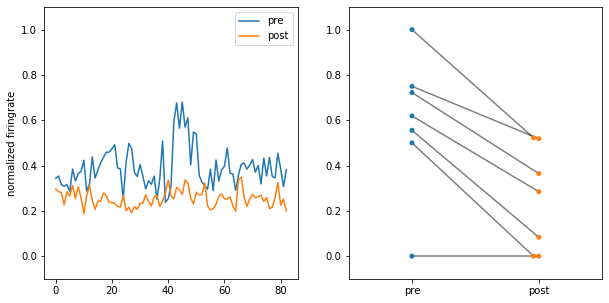

In [23]:
#plot normalize up saccade trace pre post doi 
ig, axs = plt.subplots(1,2,figsize=(10,5))
axs = axs.ravel()
ax = axs[0]

doi_df['pre_max_gratings_upsacc_avg']=doi_df['hf3_gratings_upsacc_avg'].apply(max)
doi_df['post_max_gratings_upsacc_avg']=doi_df['hf6_gratings_upsacc_avg'].apply(max)
doi_df['max_gratings_upsacc_avg']=doi_df[['pre_max_gratings_upsacc_avg','post_max_gratings_upsacc_avg']].max(axis=1)
doi_df['normalized_gratings_upsacc_avg_pre']=doi_df['hf3_gratings_upsacc_avg']/doi_df['max_gratings_upsacc_avg']
doi_df['normalized_gratings_upsacc_avg_post']=doi_df['hf6_gratings_upsacc_avg']/doi_df['max_gratings_upsacc_avg']

pre=doi_df['normalized_gratings_upsacc_avg_pre'].mean()
post=doi_df['normalized_gratings_upsacc_avg_post'].mean()

ax.plot(pre,label ='pre')
ax.plot(post,label ='post')
ax.legend()
ax.set_ylabel('normalized firingrate')
ax.set_ylim(-.1,1.1)

ax = axs[1]
doi_df['center_gratings_up_sacc_pre'] = doi_df['normalized_gratings_upsacc_avg_pre'].str[42]
doi_df['center_grating_up_sacc_post'] = doi_df['normalized_gratings_upsacc_avg_post'].str[42]
sns.swarmplot(data=doi_df[doi_df.columns[-2:]],ax=ax)
#Connect cells
#indx of each collunm 
idx0 = 0
idx1 = 1

#find paried points
locs1 = ax.get_children()[idx0].get_offsets()
locs2 = ax.get_children()[idx1].get_offsets()

for i in range(locs1.shape[0]):
    x = [locs1[i, 0], locs2[i, 0]]
    y = [locs1[i, 1], locs2[i, 1]]
    ax.plot(x, y, color='black', alpha=0.5)
# We need to draw the canvas, otherwise the labels won't be positioned and 
# won't have values yet.
fig.canvas.draw()
#Lables for x axis
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'pre'
labels[1] = 'post'

ax.set_xticklabels(labels)
ax.set_ylim(-.1,1.1)



plt.savefig('doi_upsacc_gratings')


In [20]:
fs

NameError: name 'fs' is not defined

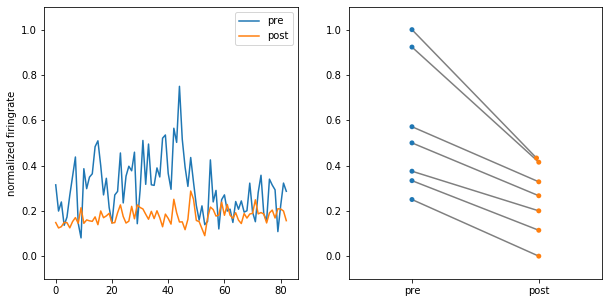

In [26]:
#plot normalize down saccade trace pre post doi 
ig, axs = plt.subplots(1,2,figsize=(10,5))
axs = axs.ravel()
ax = axs[0]

doi_df['pre_max_gratings_downsacc_avg']=doi_df['hf3_gratings_downsacc_avg'].apply(max)
doi_df['post_max_gratings_downsacc_avg']=doi_df['hf6_gratings_downsacc_avg'].apply(max)
doi_df['max_gratings_downsacc_avg']=doi_df[['pre_max_gratings_downsacc_avg','post_max_gratings_downsacc_avg']].max(axis=1)
doi_df['normalized_gratings_downsacc_avg_pre']=doi_df['hf3_gratings_downsacc_avg']/doi_df['max_gratings_downsacc_avg']
doi_df['normalized_gratings_downsacc_avg_post']=doi_df['hf6_gratings_downsacc_avg']/doi_df['max_gratings_downsacc_avg']

pre=doi_df['normalized_gratings_downsacc_avg_pre'].mean()
post=doi_df['normalized_gratings_downsacc_avg_post'].mean()

ax.plot(pre,label ='pre')
ax.plot(post,label ='post')
ax.legend()
ax.set_ylabel('normalized firingrate')
ax.set_ylim(-.1,1.1)

ax = axs[1]
doi_df['center_gratings_down_sacc_pre'] = doi_df['normalized_gratings_downsacc_avg_pre'].str[42]
doi_df['center_gratings_down_sacc_post'] = doi_df['normalized_gratings_downsacc_avg_post'].str[42]
sns.swarmplot(data=doi_df[doi_df.columns[-2:]],ax=ax)
#Connect cells
#indx of each collunm 
idx0 = 0
idx1 = 1

#find paried points
locs1 = ax.get_children()[idx0].get_offsets()
locs2 = ax.get_children()[idx1].get_offsets()

for i in range(locs1.shape[0]):
    x = [locs1[i, 0], locs2[i, 0]]
    y = [locs1[i, 1], locs2[i, 1]]
    ax.plot(x, y, color='black', alpha=0.5)
# We need to draw the canvas, otherwise the labels won't be positioned and 
# won't have values yet.
fig.canvas.draw()
#Lables for x axis
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'pre'
labels[1] = 'post'

ax.set_xticklabels(labels)
ax.set_ylim(-.1,1.1)

plt.savefig('doi_downsacc_gratings')


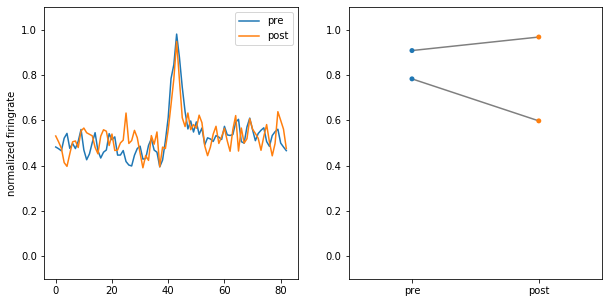

In [30]:
#plot normalize up saccade trace pre post saline 
ig, axs = plt.subplots(1,2,figsize=(10,5))
axs = axs.ravel()
ax = axs[0]

saline_df['pre_max_gratings_upsacc_avg']=saline_df['hf3_gratings_upsacc_avg'].apply(max)
saline_df['post_max_gratings_upsacc_avg']=saline_df['hf6_gratings_upsacc_avg'].apply(max)
saline_df['max_gratings_upsacc_avg']=saline_df[['pre_max_gratings_upsacc_avg','post_max_gratings_upsacc_avg']].max(axis=1)
saline_df['normalized_gratings_upsacc_avg_pre']=saline_df['hf3_gratings_upsacc_avg']/saline_df['max_gratings_upsacc_avg']
saline_df['normalized_gratings_upsacc_avg_post']=saline_df['hf6_gratings_upsacc_avg']/saline_df['max_gratings_upsacc_avg']

pre=saline_df['normalized_gratings_upsacc_avg_pre'].mean()
post=saline_df['normalized_gratings_upsacc_avg_post'].mean()

ax.plot(pre,label ='pre')
ax.plot(post,label ='post')
ax.legend()
ax.set_ylabel('normalized firingrate')
ax.set_ylim(-.1,1.1)


ax = axs[1]

saline_df['center_gratings_up_sacc_pre'] = saline_df['normalized_gratings_upsacc_avg_pre'].str[42]
saline_df['center_grating_up_sacc_post'] = saline_df['normalized_gratings_upsacc_avg_post'].str[42]
sns.swarmplot(data=saline_df[saline_df.columns[-2:]],ax=ax)
#Connect cells
#indx of each collunm 
idx0 = 0
idx1 = 1

#find paried points
locs1 = ax.get_children()[idx0].get_offsets()
locs2 = ax.get_children()[idx1].get_offsets()

for i in range(locs1.shape[0]):
    x = [locs1[i, 0], locs2[i, 0]]
    y = [locs1[i, 1], locs2[i, 1]]
    ax.plot(x, y, color='black', alpha=0.5)


       
# We need to draw the canvas, otherwise the labels won't be positioned and 
# won't have values yet.
fig.canvas.draw()
#Lables for x axis
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'pre'
labels[1] = 'post'

ax.set_xticklabels(labels)
ax.set_ylim(-.1,1.1)
plt.savefig('saline_upsacc_gratings')


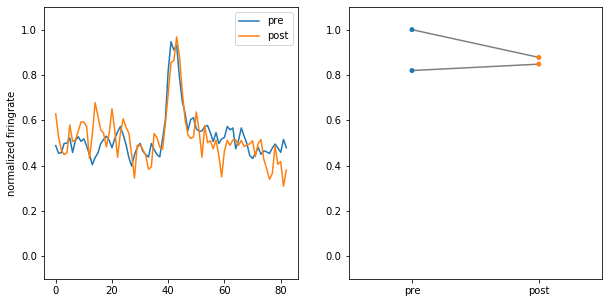

In [32]:
#plot normalize down saccade trace pre post saline 
ig, axs = plt.subplots(1,2,figsize=(10,5))
axs = axs.ravel()
ax = axs[0]

saline_df['pre_max_gratings_downsacc_avg']=saline_df['hf3_gratings_downsacc_avg'].apply(max)
saline_df['post_max_gratings_downsacc_avg']=saline_df['hf6_gratings_downsacc_avg'].apply(max)
saline_df['max_gratings_downsacc_avg']=saline_df[['pre_max_gratings_downsacc_avg','post_max_gratings_downsacc_avg']].max(axis=1)
saline_df['normalized_gratings_downsacc_avg_pre']=saline_df['hf3_gratings_downsacc_avg']/saline_df['max_gratings_downsacc_avg']
saline_df['normalized_gratings_downsacc_avg_post']=saline_df['hf6_gratings_downsacc_avg']/saline_df['max_gratings_downsacc_avg']

pre=saline_df['normalized_gratings_downsacc_avg_pre'].mean()
post=saline_df['normalized_gratings_downsacc_avg_post'].mean()

ax.plot(pre,label ='pre')
ax.plot(post,label ='post')
ax.legend()
ax.set_ylabel('normalized firingrate')
ax.set_ylim(-.1,1.1)

ax = axs[1]

saline_df['center_gratings_down_sacc_pre'] = saline_df['normalized_gratings_downsacc_avg_pre'].str[42]
saline_df['center_grating_down_sacc_post'] = saline_df['normalized_gratings_downsacc_avg_post'].str[42]
sns.swarmplot(data=saline_df[saline_df.columns[-2:]],ax=ax)
#Connect cells
#indx of each collunm 
idx0 = 0
idx1 = 1

#find paried points
locs1 = ax.get_children()[idx0].get_offsets()
locs2 = ax.get_children()[idx1].get_offsets()

for i in range(locs1.shape[0]):
    x = [locs1[i, 0], locs2[i, 0]]
    y = [locs1[i, 1], locs2[i, 1]]
    ax.plot(x, y, color='black', alpha=0.5)


       
# We need to draw the canvas, otherwise the labels won't be positioned and 
# won't have values yet.
fig.canvas.draw()
#Lables for x axis
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'pre'
labels[1] = 'post'

ax.set_xticklabels(labels)
ax.set_ylim(-.1,1.1)
plt.savefig('saline_downsacc_gratings')